In [2]:
import os
import time
import functools

import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
def tensor_to_image(tensor):
    tensor = np.array(tensor*255, dtype=np.uint8)
    
    if np.ndim(tensor) > 3:
        # assert tensor.shape[0] == 1
        tensor = tensor[0]
    else:
        raise Exception
    return PIL.Image.fromarray(tensor)

In [4]:
def load_img(path_to_img):
    max_dim = 512
    
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [9]:
stylized_image = model(tf.constant(load_img('imgs/ball.jpg')), tf.constant(load_img('imgs/jackson1.jpg')))[0]

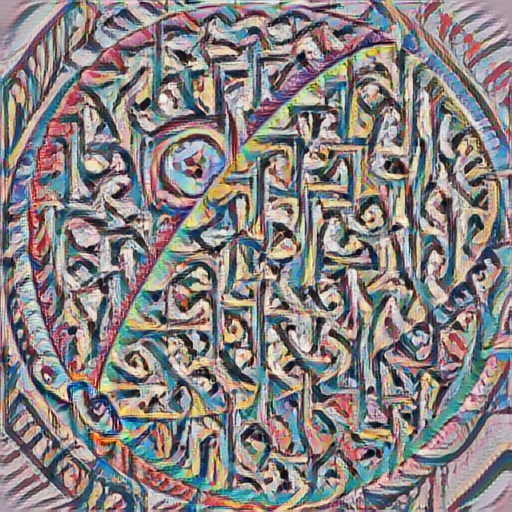

In [10]:
tensor_to_image(stylized_image)